In [ ]:
import tensorflow as tf
import keras, os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import numpy as np

In [ ]:
!pip install tflearn

In [ ]:
# !pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 90.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 52.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully u

In [ ]:
## Get data
import tflearn.datasets.oxflower17 as oxflower17

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x, y=oxflower17.load_data()

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


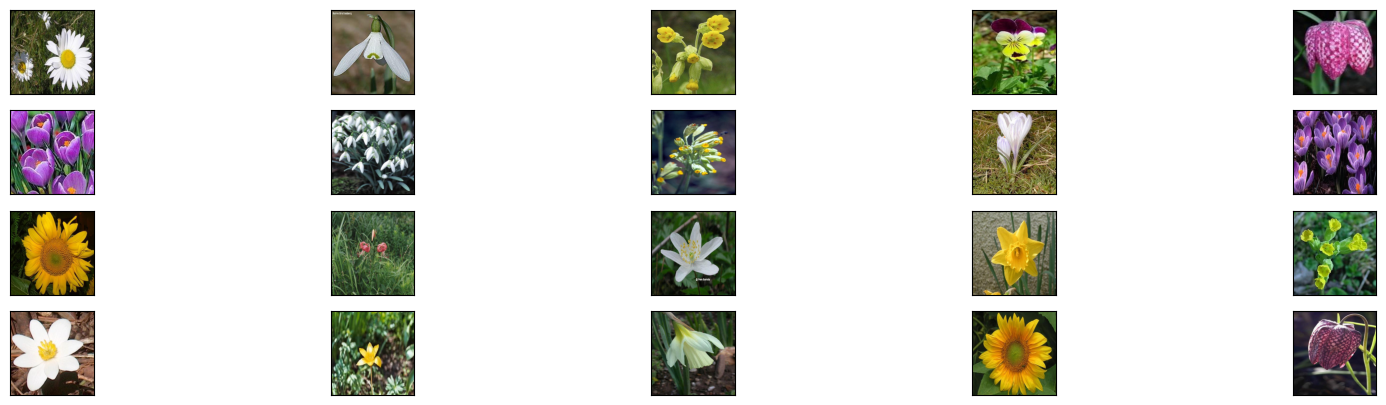

In [ ]:

fig=plt.figure(figsize=(20,5))
for i in range(20):
  ax=fig.add_subplot(4,5, i+1, xticks=[], yticks=[])
  ax.imshow(x[i])

In [ ]:
from keras.utils import to_categorical
x_train=x.astype('float32')/255
y_train=to_categorical(y, num_classes=17)

In [ ]:
x_train.shape[1:]

(224, 224, 3)

In [ ]:
y_train.shape

(1360, 17)

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(input_shape=x_train.shape[1:], filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


## Fully Connected layers
model.add(Flatten())
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=17, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_split=0.2, epochs=10, verbose=2, shuffle=True)

Train on 1088 samples, validate on 272 samples
Epoch 1/10


KeyboardInterrupt: 

In [ ]:
import gdown
url = "https://drive.google.com/file/d/12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP/view?usp=sharing"
file_id = url.split("/")[-2]
print(file_id)
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id, "catdog.zip")

12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP


Downloading...
From: https://drive.google.com/uc?/export=download&id=12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP
To: /content/catdog.zip
100%|██████████| 9.09M/9.09M [00:00<00:00, 26.2MB/s]


'catdog.zip'

In [ ]:
!unzip 'catdog.zip'

Archive:  catdog.zip
   creating: train/
   creating: train/Cat/
  inflating: train/Cat/0.jpg         
  inflating: train/Cat/1.jpg         
  inflating: train/Cat/2.jpg         
  inflating: train/Cat/cat.2405.jpg  
  inflating: train/Cat/cat.2406.jpg  
  inflating: train/Cat/cat.2436.jpg  
  inflating: train/Cat/cat.2437.jpg  
  inflating: train/Cat/cat.2438.jpg  
  inflating: train/Cat/cat.2439.jpg  
  inflating: train/Cat/cat.2440.jpg  
  inflating: train/Cat/cat.2441.jpg  
  inflating: train/Cat/cat.2442.jpg  
  inflating: train/Cat/cat.2443.jpg  
  inflating: train/Cat/cat.2444.jpg  
  inflating: train/Cat/cat.2445.jpg  
  inflating: train/Cat/cat.2446.jpg  
  inflating: train/Cat/cat.2447.jpg  
  inflating: train/Cat/cat.2448.jpg  
  inflating: train/Cat/cat.2449.jpg  
  inflating: train/Cat/cat.2450.jpg  
  inflating: train/Cat/cat.2451.jpg  
  inflating: train/Cat/cat.2452.jpg  
  inflating: train/Cat/cat.2453.jpg  
  inflating: train/Cat/cat.2454.jpg  
  inflating: train/Cat/

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
"""
The preprocess_input function is used to prepare images for input into the VGG16 model,
 by rescaling the pixel values to a range of 0 to 1 and subtracting the mean RGB values
 of the ImageNet dataset
"""

In [ ]:
## Set the path to training and validation data.
train_data_dir='/content/train'
validation_data_dir='/content/validation'

In [ ]:
## Set the number of training and validation sample.
num_train_samples=2000
num_validation_samples=800

In [ ]:
# Set the number of epochs and batch size
epoch=1
batch_size=16

# Load the VGG16 model without the top layer.

base_model=VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



In [ ]:
base_model.layers[0].trainable

True

In [ ]:
# Freeze the base model layers
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
# Crate a new model
model=Sequential()
model.add(base_model)

In [ ]:
## Add Custom layers on top of the base model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
## Preprocess the training and validation data
##  # This function is typically used to normalize or scale the pixel values of the images before they are fed into a neural network.
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
validation_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator=train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary'

)
validation_generator=validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

Found 337 images belonging to 2 classes.
Found 59 images belonging to 2 classes.


In [ ]:
# Train the model
model.fit(train_generator, steps_per_epoch=num_train_samples// batch_size,
          epochs=epoch,
          validation_data=validation_generator,
          validation_steps=num_validation_samples//batch_size
          )


125/125 [==============================] - 917s 7s/step - batch: 62.0000 - size: 15.4000 - loss: 1.8718 - acc: 0.9636 - val_loss: 1.8579 - val_acc: 0.9514


In [ ]:
model.save('dog_cat_vgg16.h5')